# Punto 3 - Tarea 1 - Estadistica3_2023-2

Importaremos primero las librerías que vamos a usar

In [2]:
import numpy as np
import os
import pandas as pd
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

Leeremos el dataset CARS.csv


In [3]:
df = pd.read_csv("data/CARS.csv")

In [4]:
#PRIMERA FORMA DE VERIFICAR QUE SI HAYA LEIDO CARS.csv
print(df.head())#muestra las primeras lineas del DataFrame

    Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197  


In [7]:
#SEGUNDA FORMA DE VERIFICAR QUE SI HAYA LEIDO CARS.csv
print(df.info()) #Verifica info del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB
None


In [8]:
#VERIFICAMOS SI HAY VALORES NULOS
print(df.isnull().sum())

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


Podemos observar que en la columna **Cylinders** existen 2 valores nulos

## 3.1.1 Para las variables categóricas un gráfico de barras

Las variables categóricas son: Make, Type, Origin, DriveTrain.

Podemos hacer gráfico de barras empleando Plotly o matplotlib

Pero para este punto solo se mostrará el ejemplo en código en Plotly de uno solo,

(al parecer GIT no permite visualizar gráficos en plotly)


y los demás serán en matplotlib

In [ ]:
#Plotly(en este caso llamamos plotly con px)
#categoria_counts = df['Origin'].value_counts()

#fig = px.bar(df, x=categoria_counts.index, y=categoria_counts.values, title='Origen')
#fig.update_traces(text=categoria_counts.values, textposition='outside')
#fig.update_layout(xaxis_title='Categoría', yaxis_title='Frecuencia')
#fig.show()

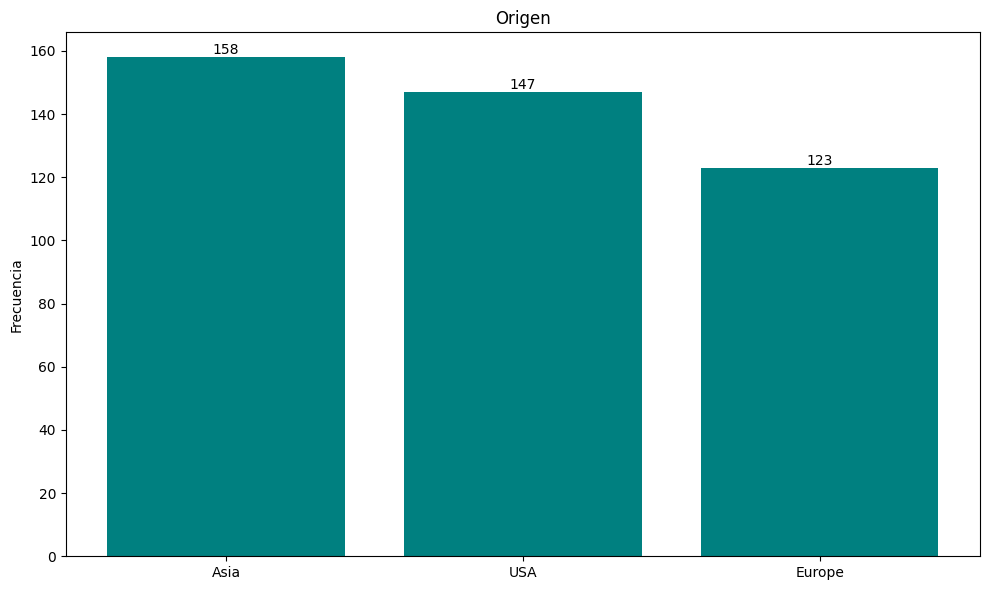

In [62]:
#Usando matplotlib
categoria_counts = df['Origin'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(categoria_counts.index, categoria_counts.values, color = "teal")

#Para poder mostrar la frecuencia con la que se repiten los datos sobre la barra 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

#Daremos nombre al titulo y los ejes
plt.title('Origen')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

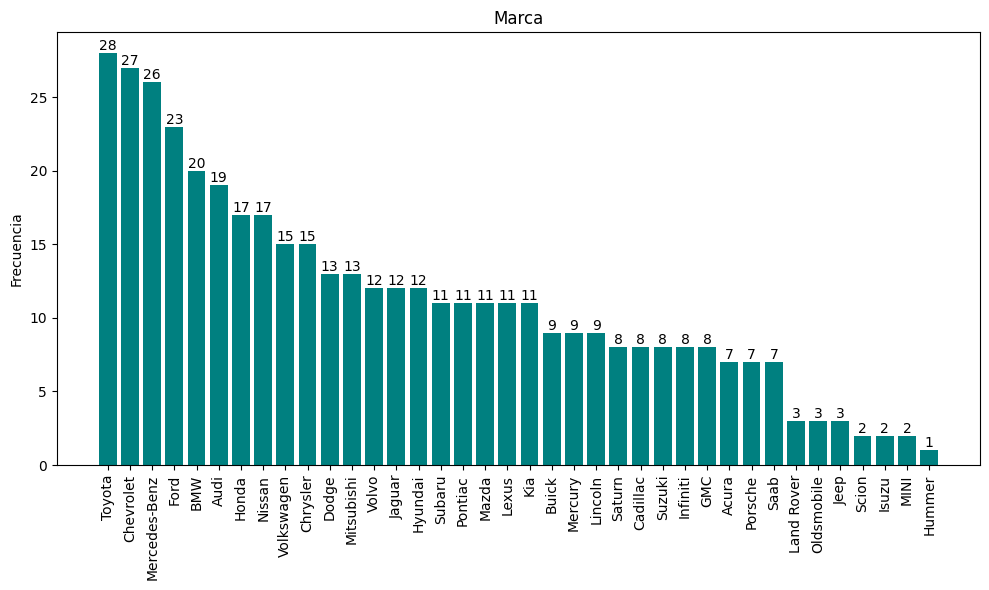

In [60]:
categoria_counts = df['Make'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(categoria_counts.index, categoria_counts.values,color = "teal")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)
plt.title('Marca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)#Una rotación de los nombres en X para poderlos ver mejor
plt.tight_layout()
plt.show()

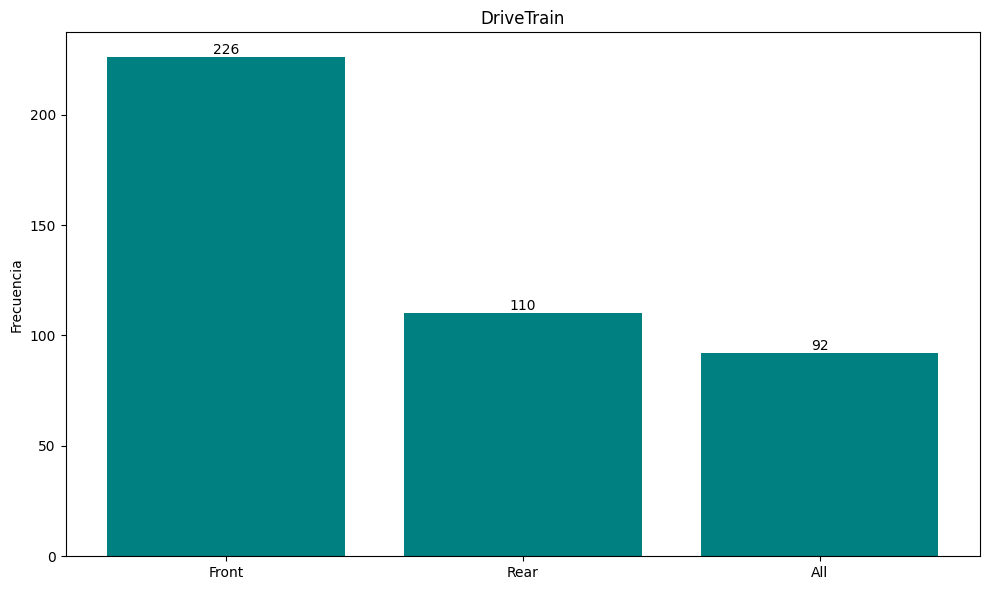

In [59]:
categoria_counts = df['DriveTrain'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(categoria_counts.index, categoria_counts.values,color = "teal")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)
plt.title('DriveTrain')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

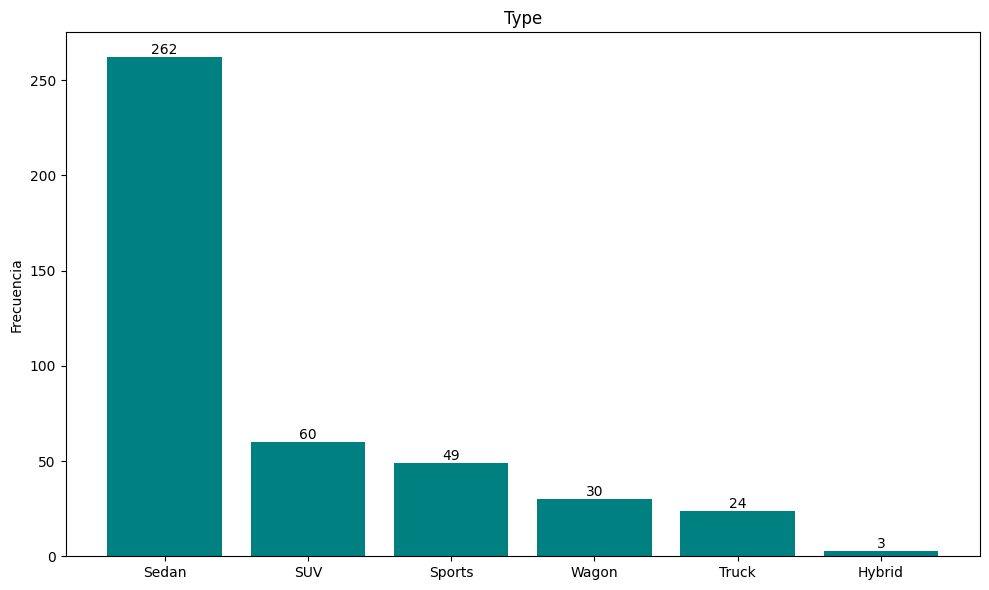

In [58]:
categoria_counts = df['Type'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(categoria_counts.index, categoria_counts.values,color = "teal")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)
plt.title('Type')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## 3.1.2 Para las variables numéricas crear histogramas. 
Listar los modelos de carros que están más lejos de 5 estándares de desviación, y serían considerados como outliers.
Hacer test de si es una distribución normal o no.


Identificaremos primero cuales son las variables numéricas que poseemos.

In [9]:
# Identificamos columnas numéricas
print("Columnas numéricas que se van a trabajar:")
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

Columnas numéricas que se van a trabajar:
['MSRP', 'Invoice', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length']


Realizamos los histogramas

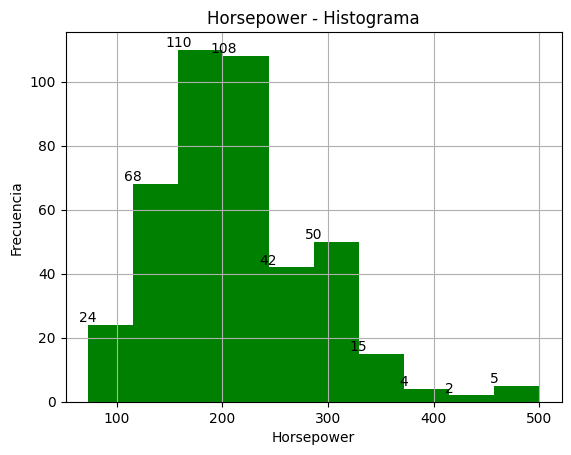

In [63]:
#Creamos el histograma con Bins=10 para facilidad de interpretación del gráfico.
plt.hist(df["Horsepower"], bins=10, color='green')
#Añadimos valores encima de las barras de la siguiente forma
for i in range(len(hist[0])):
    plt.text(hist[1][i], hist[0][i], str(int(hist[0][i])), ha='center', va='bottom')
#Añadimos titulo al gráfico y a los ejes
plt.title('Horsepower - Histograma')
plt.xlabel('Horsepower')
plt.ylabel('Frecuencia')
plt.grid(True)#Añadimos la cuadricula
plt.show()